<a href="https://colab.research.google.com/github/ninja03jod/Machine_Learning_Projects/blob/main/ML_model_Predict_Thyroid_Cancer_Recurrence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/Thyroid_Diff.csv")
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [3]:
# Lets chcek some data set info:
def Info(df):
    print(f"Total rows and columns: {df.shape}\n")
    print(f"Columns are:{df.columns}\n")
    print("*"*170)

    # Lets chcek the dtype and non null values and null values:
    print("Info:\n ")
    print(f"{df.info()}\n\n")
    print(f"Null Values:\n{df.isnull().sum()}\n")
    print("*"*170)

    # Lets chcek the weather the data is imbalanced or not:
    print(f"Checking the Recurrance data is imbalanced or not:\n{df.Recurred.value_counts(normalize=True)*100}\n")

    # Alternate approach for checking imbalance data:
    class_Yes = np.round((df['Recurred'].value_counts()["Yes"]/df.shape[0])*100,2)
    class_No = np.round((df['Recurred'].value_counts()['No']/df.shape[0])*100,2)
    print(f"Percentage of Recurred occur means Yes: {class_Yes}\n")
    print(f"Percentage of Recurred did not occur means No: {class_No}\n")
    print("Here we have 2 options we can handled the imbalanced data set thorugh oversampling and under sampling and also we can use stratify")
Info(df)

Total rows and columns: (383, 17)

Columns are:Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

**************************************************************************************************************************************************************************
Info:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examinatio

In [4]:
# lets see some random 10 samples:
df.sample(10)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
244,35,F,No,No,No,Clinical Hyperthyroidism,Multinodular goiter,No,Papillary,Uni-Focal,Low,T3a,N0,M0,I,Excellent,No
61,35,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
213,51,M,No,No,No,Clinical Hyperthyroidism,Single nodular goiter-right,Right,Papillary,Uni-Focal,Intermediate,T2,N1b,M0,I,Indeterminate,No
33,55,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
325,65,F,No,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,II,Biochemical Incomplete,Yes
291,44,F,No,No,No,Euthyroid,Multinodular goiter,Right,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Excellent,No
157,24,M,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
125,31,F,No,Yes,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
132,32,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
234,60,F,No,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,Intermediate,T2,N1b,M0,I,Structural Incomplete,Yes


In [5]:
# Here we have categorical data:
# fetch categorical columns:
cat_col = df.select_dtypes(include=object)
cat_col.columns

Index(['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [6]:
cat_col.shape[1]

16

In [7]:
# We can fetch the categorical columns using python approach:
Numeric_col = [features for features in df.columns if df[features].dtypes != 'O']

cat1_col = [cat for cat in df.columns if cat not in Numeric_col]
print(Numeric_col,"\n",cat1_col)

['Age'] 
 ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']


In [8]:
# lets fill space by underscore
cat_col.columns = cat_col.columns.str.replace(" ","_")
cat_col.columns

Index(['Gender', 'Smoking', 'Hx_Smoking', 'Hx_Radiothreapy',
       'Thyroid_Function', 'Physical_Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [9]:
df.columns = df.columns.str.replace(" ","_")
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx_Smoking', 'Hx_Radiothreapy',
       'Thyroid_Function', 'Physical_Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

### ***Perform some data visualization***

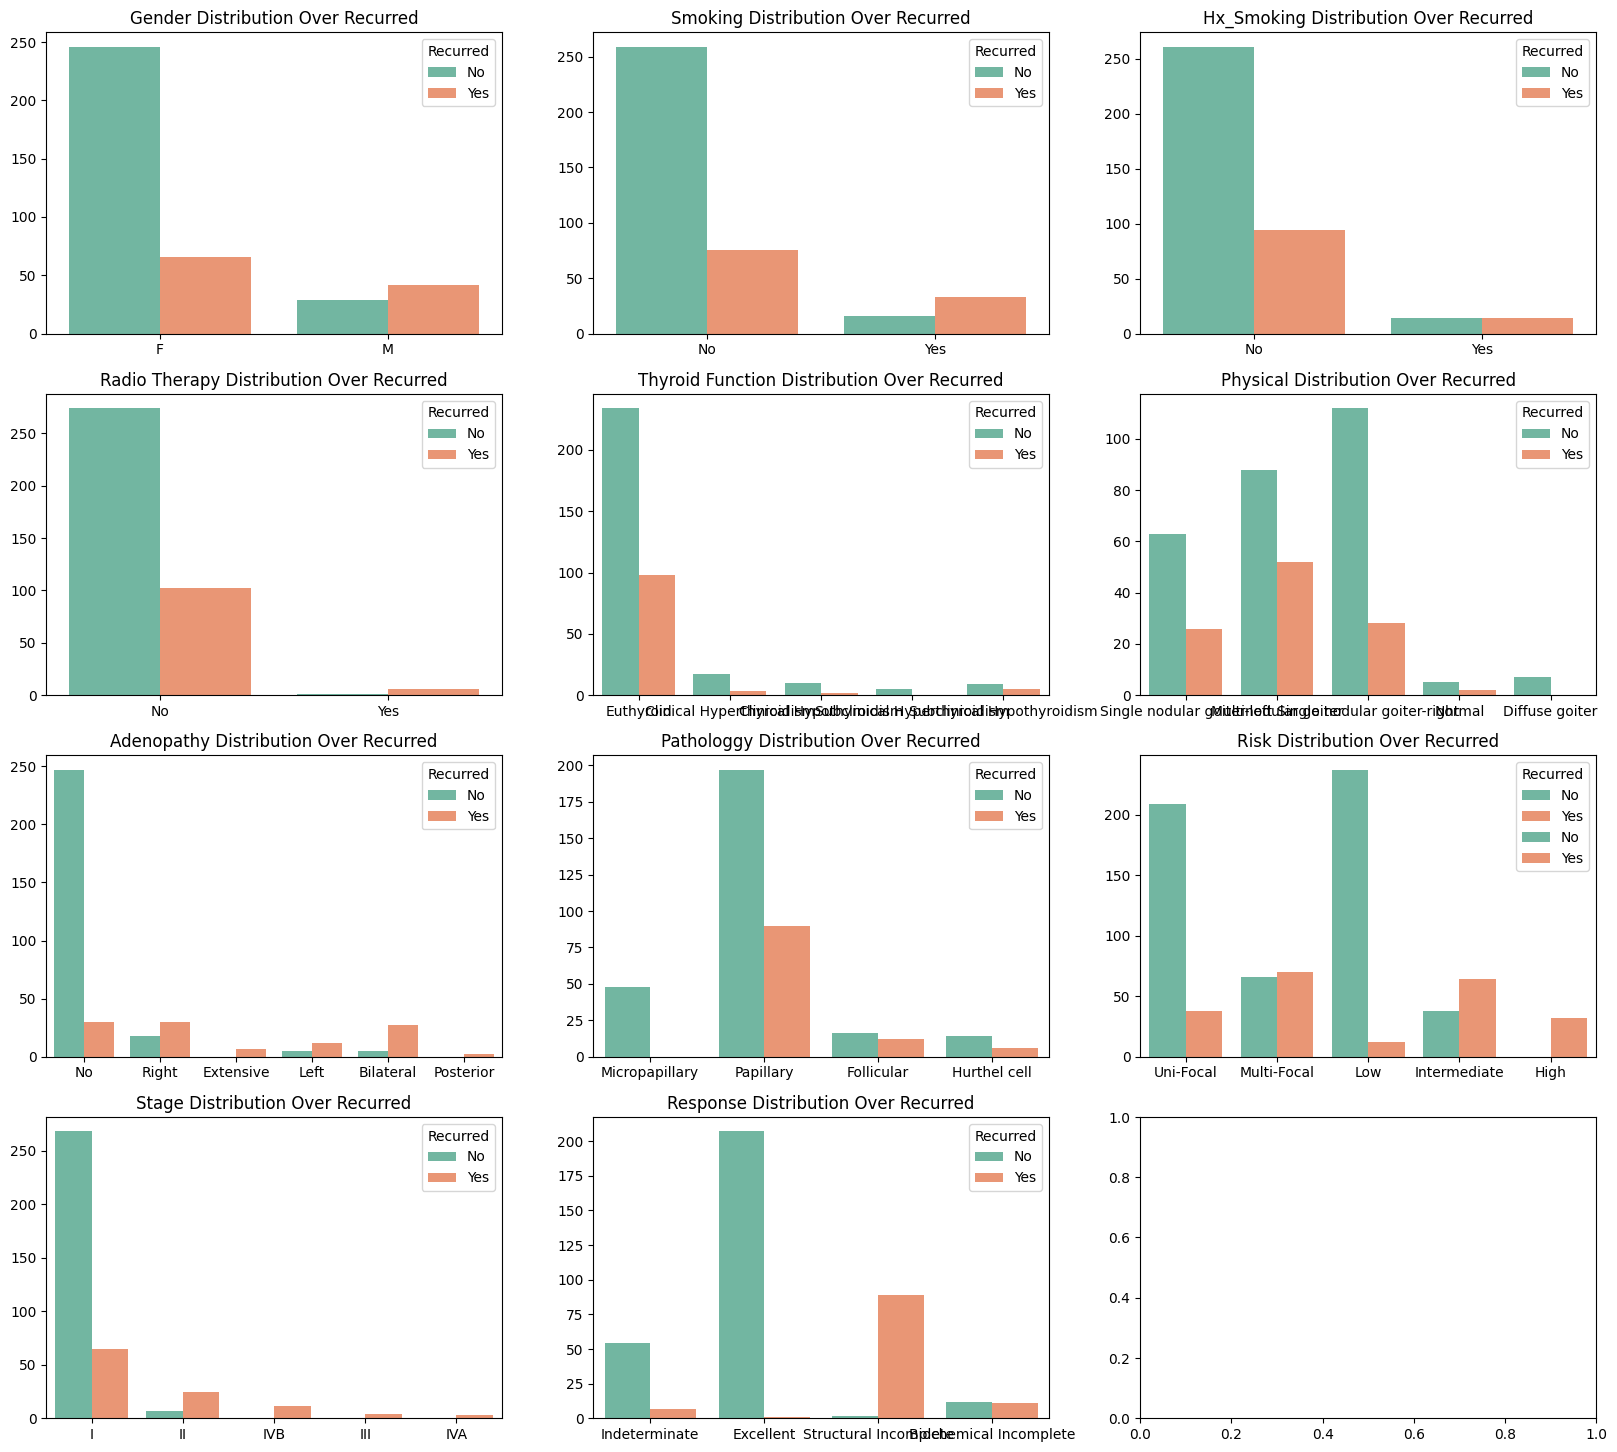

In [10]:
fig,axis = plt.subplots(4,3,figsize=(20,18))

g = sns.countplot(data=df,x="Gender",hue="Recurred",ax=axis[0,0],palette="Set2")
g.set(xlabel="")
g.set(ylabel="")
g.title.set_text("Gender Distribution Over Recurred")

g = sns.countplot(data=df,x="Smoking",hue="Recurred",ax=axis[0,1],palette="Set2")
g.set(xlabel="")
g.set(ylabel="")
g.title.set_text("Smoking Distribution Over Recurred")

g = sns.countplot(data=df,x="Hx_Smoking",hue="Recurred",ax=axis[0,2],palette="Set2")
g.set(xlabel="")
g.set(ylabel="")
g.title.set_text("Hx_Smoking Distribution Over Recurred")

g = sns.countplot(data=df,x="Hx_Radiothreapy",hue="Recurred",ax=axis[1,0],palette="Set2")
g.set(xlabel="")
g.set(ylabel="")
g.title.set_text("Radio Therapy Distribution Over Recurred")

g = sns.countplot(data=df,x="Thyroid_Function",hue="Recurred",ax=axis[1,1],orient='h',palette="Set2")
g.set(xlabel="")
g.set(ylabel="")
g.title.set_text("Thyroid Function Distribution Over Recurred")

g = sns.countplot(data=df,x="Physical_Examination",hue="Recurred",ax=axis[1,2],orient='h',palette="Set2")
g.set(xlabel="")
g.set(ylabel="")
g.title.set_text("Physical Distribution Over Recurred")

g = sns.countplot(data=df,x="Adenopathy",hue="Recurred",ax=axis[2,0],palette="Set2")
g.set(xlabel="")
g.set(ylabel="")
g.title.set_text("Adenopathy Distribution Over Recurred")

g = sns.countplot(data=df,x="Pathology",hue="Recurred",ax=axis[2,1],palette="Set2")
g.set(xlabel="")
g.set(ylabel="")
g.title.set_text("Pathologgy Distribution Over Recurred")

g = sns.countplot(data=df,x="Focality",hue="Recurred",ax=axis[2,2],palette="Set2")
g.set(xlabel="")
g.set(ylabel="")
g.title.set_text("Pathologgy Distribution Over Recurred")

g = sns.countplot(data=df,x="Risk",hue="Recurred",ax=axis[2,2],palette="Set2")
g.set(xlabel="")
g.set(ylabel="")
g.title.set_text("Risk Distribution Over Recurred")

g = sns.countplot(data=df,x="Stage",hue="Recurred",ax=axis[3,0],palette="Set2")
g.set(xlabel="")
g.set(ylabel="")
g.title.set_text("Stage Distribution Over Recurred")

g = sns.countplot(data=df,x="Response",hue="Recurred",ax=axis[3,1],palette="Set2")
g.set(xlabel="")
g.set(ylabel="")
g.title.set_text("Response Distribution Over Recurred")
plt.show()

Text(0.5, 1.0, 'Gender distribution')

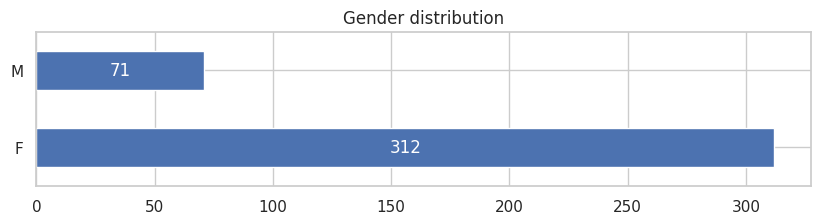

In [ ]:
bar = cat_col.Gender.value_counts().plot.barh(figsize=(10,2))
plt.bar_label(bar.containers[0],label_type="center",color="white")
plt.title("Gender distribution")

In [ ]:
# lets take look at last 10 columns
df.tail(10)

,Age,Gender,Smoking,Hx_Smoking,Hx_Radiothreapy,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
373,31,M,Yes,No,Yes,Euthyroid,Single nodular goiter-left,Extensive,Papillary,Multi-Focal,High,T4a,N1b,M1,II,Structural Incomplete,Yes
374,62,M,Yes,No,No,Euthyroid,Single nodular goiter-left,Left,Papillary,Multi-Focal,High,T4a,N1b,M1,IVB,Structural Incomplete,Yes
375,59,F,No,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVB,Structural Incomplete,Yes
376,40,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,I,Structural Incomplete,Yes
377,46,M,Yes,No,No,Euthyroid,Single nodular goiter-left,Bilateral,Follicular,Uni-Focal,High,T4b,N1b,M1,II,Structural Incomplete,Yes
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes
382,67,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [11]:
from sklearn.preprocessing import LabelEncoder # used t convert categorical columns into numerical

In [12]:
encode = LabelEncoder()
encode

LabelEncoder()

In [13]:
# lets convert categorical columns into numerical
for i in cat_col.columns:
  df[i] = encode.fit_transform(df[i])

In [14]:
df.drop(columns=['T','N','M'],inplace=True)

In [15]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx_Smoking', 'Hx_Radiothreapy',
       'Thyroid_Function', 'Physical_Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'Stage', 'Response', 'Recurred'],
      dtype='object')

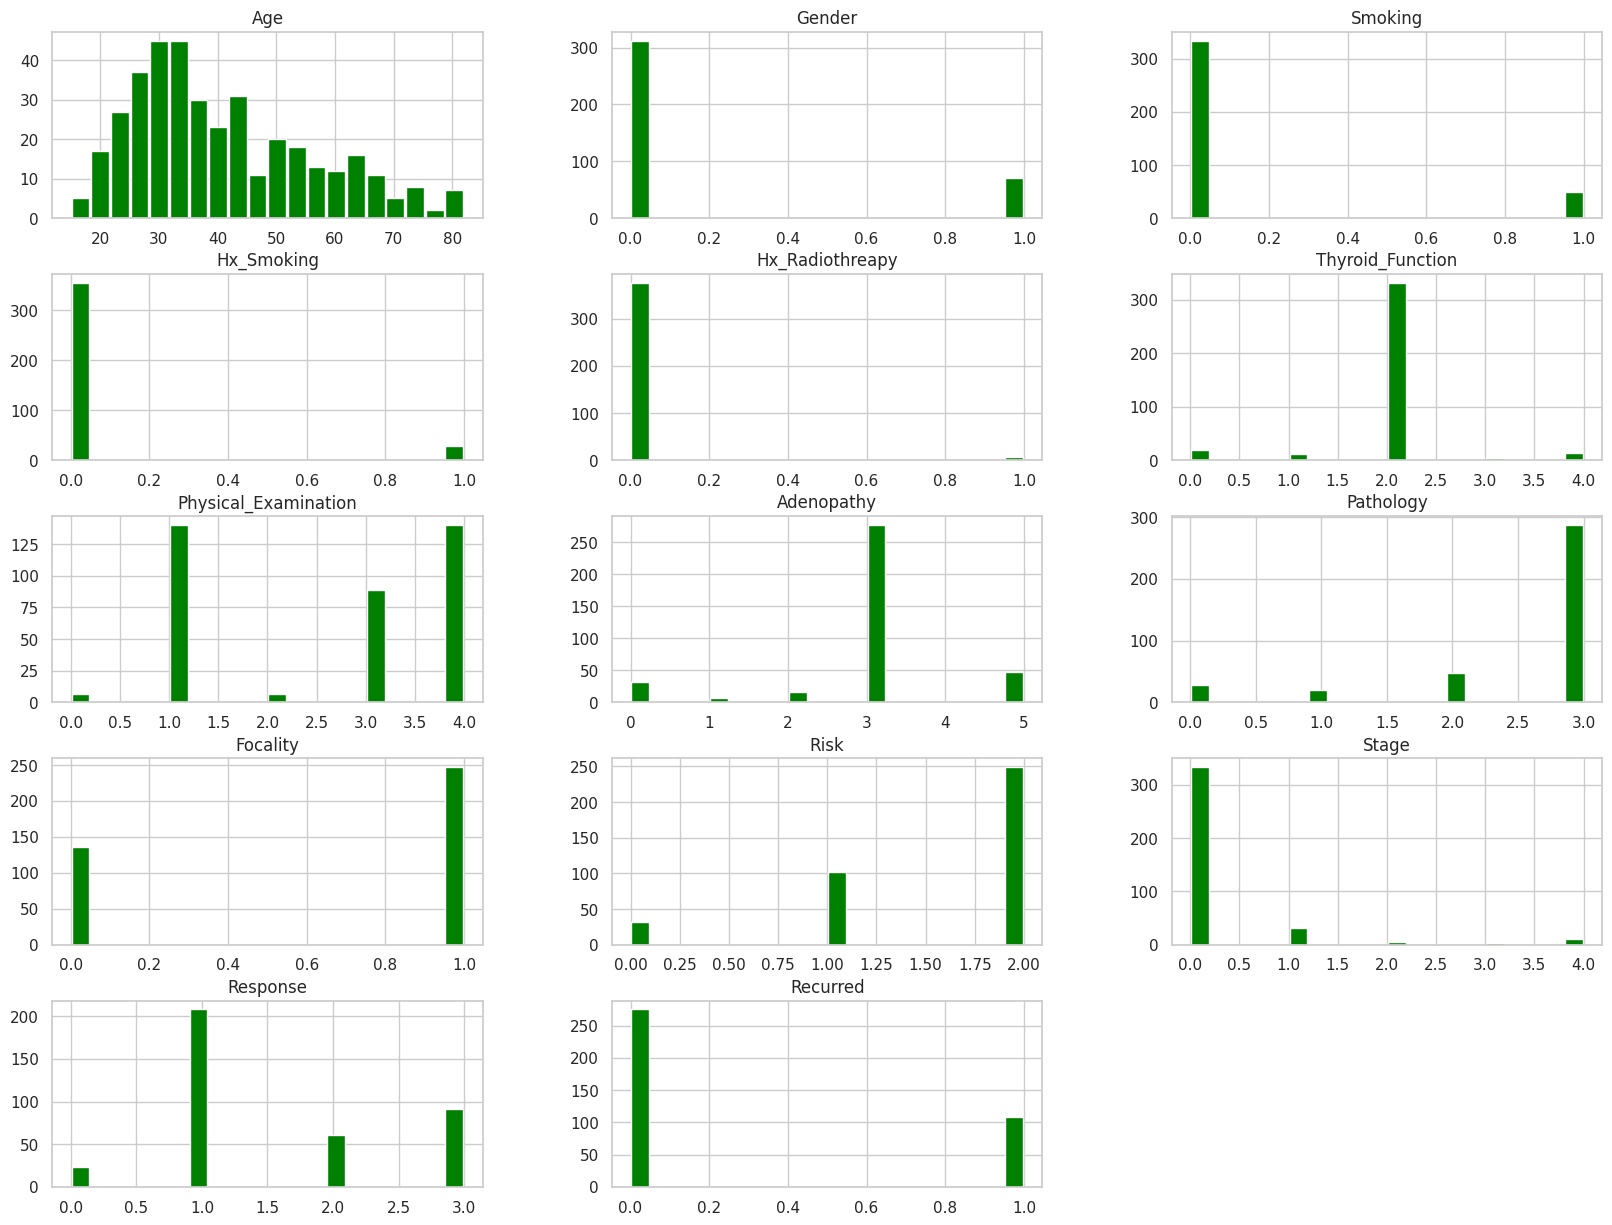

In [ ]:
df.hist(column=df.columns,color="green",rwidth=0.9,layout=(5,3),bins=20,figsize=(20,15));

In [ ]:
# we can plot both hist and bo plot with using functions:
plt.style.use("ggplot")
def hist_box_plots(data,col,bins="auto"):
  fig,axis = plt.subplots(ncols=2,figsize=(11,3))

  sns.histplot(data=data,x=col,bins=bins,ax=axis[0],kde=True)
  sns.boxplot(data=data,x=col,ax=axis[1])

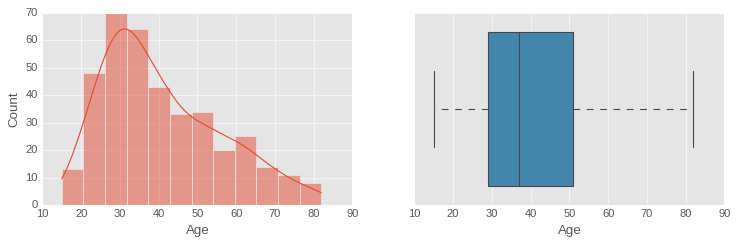

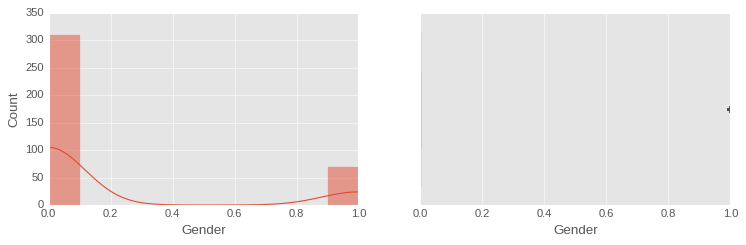

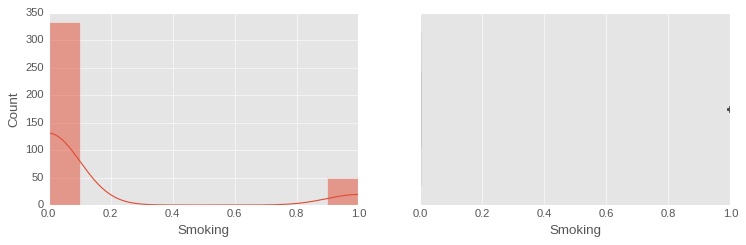

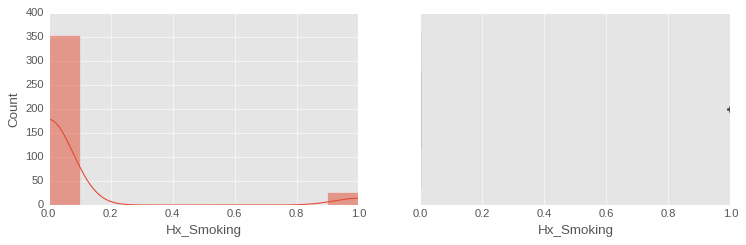

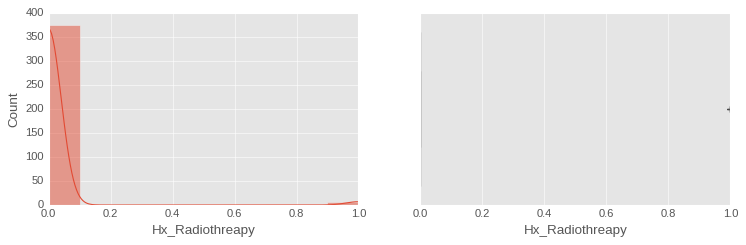

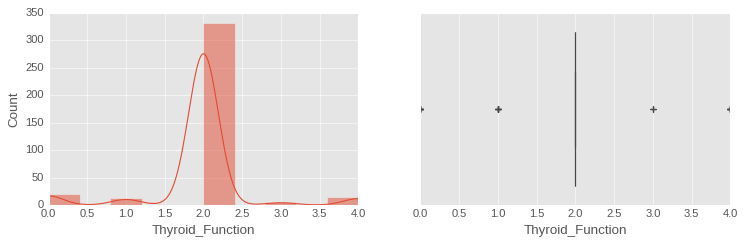

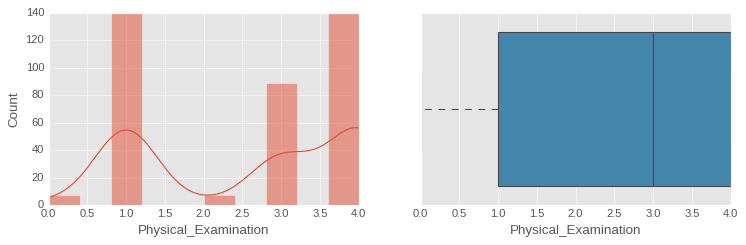

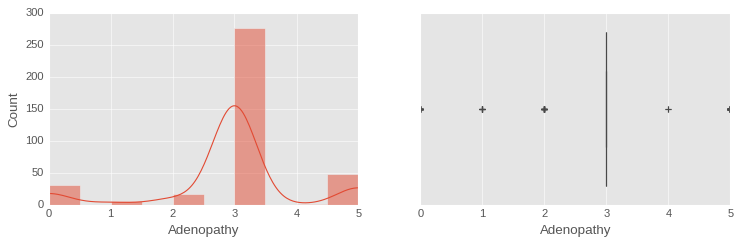

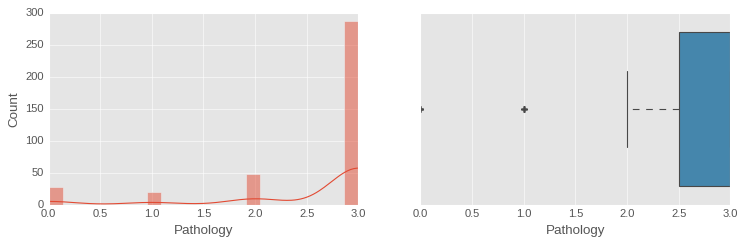

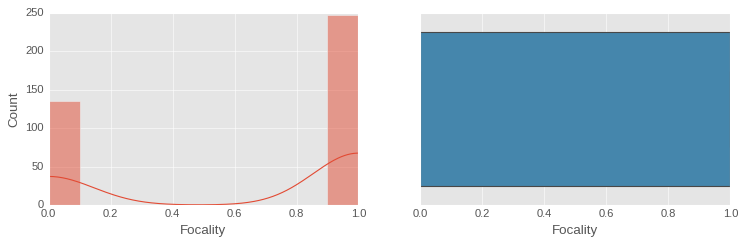

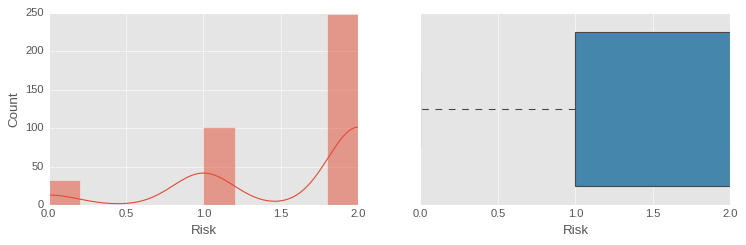

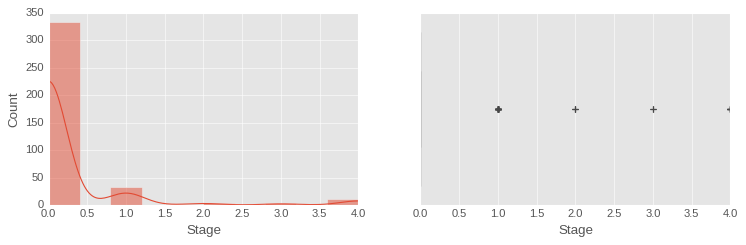

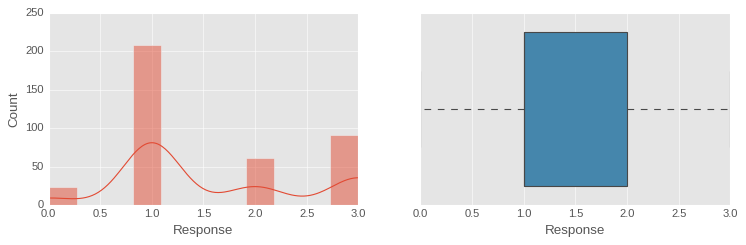

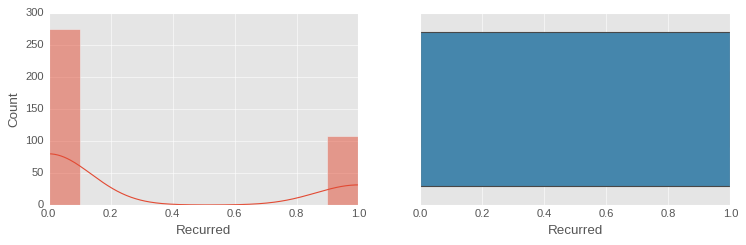

In [ ]:
for col in df.columns:
  hist_box_plots(df,col)

In [16]:
# Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,recall_score,precision_score,f1_score,accuracy_score

### ***Modeling***

In [17]:
model = LogisticRegression()
model

LogisticRegression()

In [19]:
X = df.iloc[:,:-1]
y = df['Recurred']
display(X,y)

,Age,Gender,Smoking,Hx_Smoking,Hx_Radiothreapy,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,Stage,Response
0,27,0,0,0,0,2,3,3,2,1,2,0,2
1,34,0,0,1,0,2,1,3,2,1,2,0,1
2,30,0,0,0,0,2,4,3,2,1,2,0,1
3,62,0,0,0,0,2,4,3,2,1,2,0,1
4,62,0,0,0,0,2,1,3,2,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,2,4,5,3,1,0,4,0
379,81,1,1,0,1,2,1,1,3,0,0,4,3
380,72,1,1,1,0,2,1,0,3,0,0,4,3
381,61,1,1,1,1,0,1,1,1,0,0,3,3


0      0
1      0
2      0
3      0
4      0
      ..
378    1
379    1
380    1
381    1
382    1
Name: Recurred, Length: 383, dtype: int64

### ***Data Splitting***
###### ***Here we are going to use stratified condition for balancing imbalanced data***

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify = y,random_state=42)

In [26]:
# lets chcek the data is in proportion or not
print(f"Checking the training data is n proportion:\n{y_train.value_counts(normalize=True)*100}\n\n")
print(f"Checking the testing data is n proportion:\n{y_test.value_counts(normalize=True)*100}\n\n")
print("Here we have small data thats why we are not able to get the data in proportion\n\n")
print("In above case:\n0 --> recurrance will not occur --> cancer will not comeback after inital treatment\n1 --> recurrance will occur --> cancer will recur after initial treatment ")

Checking the training data is n proportion:
0    71.777003
1    28.222997
Name: Recurred, dtype: float64


Checking the testing data is n proportion:
0    71.875
1    28.125
Name: Recurred, dtype: float64


Here we have small data thats why we are not able to get the data in proportion


In above case:
0 --> recurrance will not occur --> cancer will not comeback after inital treatment
1 --> recurrance will occur --> cancer will recur after initial treatment 


In [27]:
df.Recurred.value_counts()

0    275
1    108
Name: Recurred, dtype: int64

In [28]:
# import library for performing under sampling
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler

In [31]:
# we have to use over or under sampling technique:
# undersampling means we are reducing the number of instances of majority class
Majority_class = df[df.Recurred == 0]
df_undersampled_majority = resample(Majority_class,replace=True,n_samples= len(df[df.Recurred == 1]),random_state=0)
print(f"Majority class 0 will be resample with length of Minority class 1:\n {df_undersampled_majority.Recurred.value_counts()}\n")

# Lets concat under sampled data in dataset:
df_undersampled = pd.concat([df[df.Recurred == 1],df_undersampled_majority])
print(f"After adding under sampled data into dataset:\n{df_undersampled.Recurred.value_counts()}")

Majority class 0 will be resample with length of Minority class 1:
 0    108
Name: Recurred, dtype: int64

After adding under sampled data into dataset:
1    108
0    108
Name: Recurred, dtype: int64


In [32]:
df_undersampled.head()

,Age,Gender,Smoking,Hx_Smoking,Hx_Radiothreapy,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,Stage,Response,Recurred
48,26,0,0,0,0,2,2,1,3,1,1,0,3,1
87,36,0,0,0,0,2,1,3,3,0,2,0,2,1
88,35,0,0,0,0,2,1,5,3,0,1,0,3,1
89,31,1,1,0,0,2,1,5,3,0,1,0,3,1
90,18,0,0,0,0,2,4,5,3,1,1,0,3,1


In [33]:
X = df_undersampled.iloc[:,:-1]
y = df_undersampled['Recurred']
display(X,y)

,Age,Gender,Smoking,Hx_Smoking,Hx_Radiothreapy,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,Stage,Response
48,26,0,0,0,0,2,2,1,3,1,1,0,3
87,36,0,0,0,0,2,1,3,3,0,2,0,2
88,35,0,0,0,0,2,1,5,3,0,1,0,3
89,31,1,1,0,0,2,1,5,3,0,1,0,3
90,18,0,0,0,0,2,4,5,3,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,59,0,0,0,0,2,3,3,2,1,2,0,1
284,34,0,0,0,0,2,4,3,3,1,1,0,1
81,17,0,0,1,0,2,4,3,3,1,2,0,1
32,36,0,0,0,0,2,4,3,2,1,2,0,1


48     1
87     1
88     1
89     1
90     1
      ..
11     0
284    0
81     0
32     0
188    0
Name: Recurred, Length: 216, dtype: int64

In [34]:
# lets train the model:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
print(f"Checking the percentage of training data is n proportion:\n{y_train.value_counts(normalize=True)*100}\n\n")
print(f"Checking the percentage testing data is n proportion:\n{y_test.value_counts(normalize=True)*100}\n\n")
print("Here data is in proportion")

Checking the percentage of training data is n proportion:
1    52.906977
0    47.093023
Name: Recurred, dtype: float64


Checking the percentage testing data is n proportion:
0    61.363636
1    38.636364
Name: Recurred, dtype: float64


Here data is in proportion


In [41]:
model = LogisticRegression()
model

LogisticRegression()

In [43]:
# training:
model.fit(x_train,y_train)

LogisticRegression()

In [44]:
# testing:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1])

In [45]:
# actual data:
y_test.values

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1])

In [57]:
# Lets see the Error :
print("Errors in testing data:")
Error = y_test - y_pred
Err = pd.Series(Error)
for i in Err:
  if i == -1:
    print(i)

Errors in testing data:
-1
-1
-1
-1


### ***Performance measures/metrics:***

In [58]:
# lets see the model accuracy:
accuracy_score(y_test,y_pred)

0.8863636363636364

In [60]:
# confusion_matrix:
con_mat = confusion_matrix(y_test,y_pred)
con_mat

array([[23,  4],
       [ 1, 16]])

In this case:

Objective = After initial Treatment how many patient will be free from thyroid cancer:

Here for 27 patient No Recurrance occurs and for 17 patient will occur

Out of 27 patient --> model predicts that for 23 pateint cancer will not affect so these statment lies under True Negative Category

Remaning 4 patient who will not affect by thyroid cancer after treatment but model predicting that they will recurr with cancer --> False positive

Out of 17 patient --> model predicts that for 16 patient cancer will occurs so these will be --> True Positive

Remaning 1 patient who will affect by cancer in future but model predicts that he will not be recurr --> Flase Negative



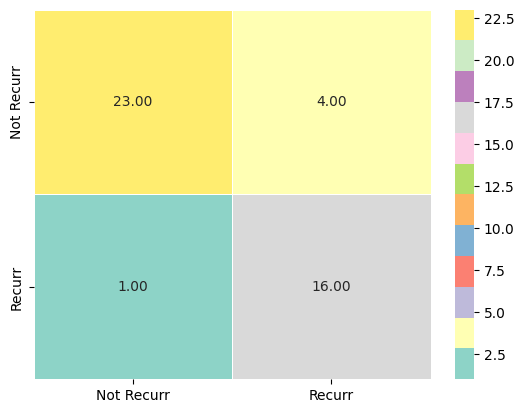

In [68]:
# lets implement confusion matrix in heatmap:
sns.heatmap(data=con_mat,annot=True,fmt=".2f",linewidth=0.6,linecolor="white",cmap="Set3",xticklabels=["Not Recurr","Recurr"],yticklabels=["Not Recurr","Recurr"])
print("In this case:\n")
print("Objective = After initial Treatment how many patient will be free from thyroid cancer:\n")
print("Here for 27 patient No Recurrance occurs and for 17 patient will occur\n")
print("Out of 27 patient --> model predicts that for 23 pateint cancer will not affect so these statment lies under True Negative Category\n")
print("Remaning 4 patient who will not affect by thyroid cancer after treatment but model predicting that they will recurr with cancer --> False positive\n")
print("Out of 17 patient --> model predicts that for 16 patient cancer will occurs so these will be --> True Positive\n")
print("Remaning 1 patient who will affect by cancer in future but model predicts that he will not be recurr --> Flase Negative\n")

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        27
           1       0.80      0.94      0.86        17

    accuracy                           0.89        44
   macro avg       0.88      0.90      0.88        44
weighted avg       0.90      0.89      0.89        44



In [70]:
recall_score(y_test,y_pred)*100

94.11764705882352

In [72]:
precision_score(y_test,y_pred)*100

80.0

In [74]:
f1_score(y_test,y_pred)*100

86.48648648648648

<Axes: >

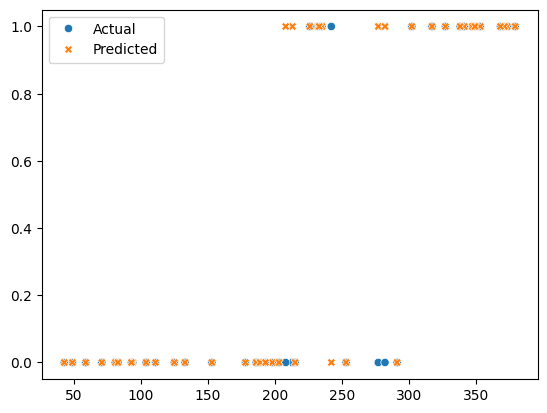

In [75]:
# logistic regression plot
log = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
sns.scatterplot(data=log)